# 1. Import packages and dataset

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import math
import pandas as pd  
import networkx as nx
from collections import defaultdict
import random
import numpy as np
import heapq
import EoN
from collections import defaultdict
from collections import Counter
from pylab import *
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


# 2. Visualization
### Visualize the network such that the node color varies with degree and node size with betweenness centrality

(-0.6440548598766327,
 0.4383260905742645,
 -1.0998681873083114,
 1.0972319334745406)

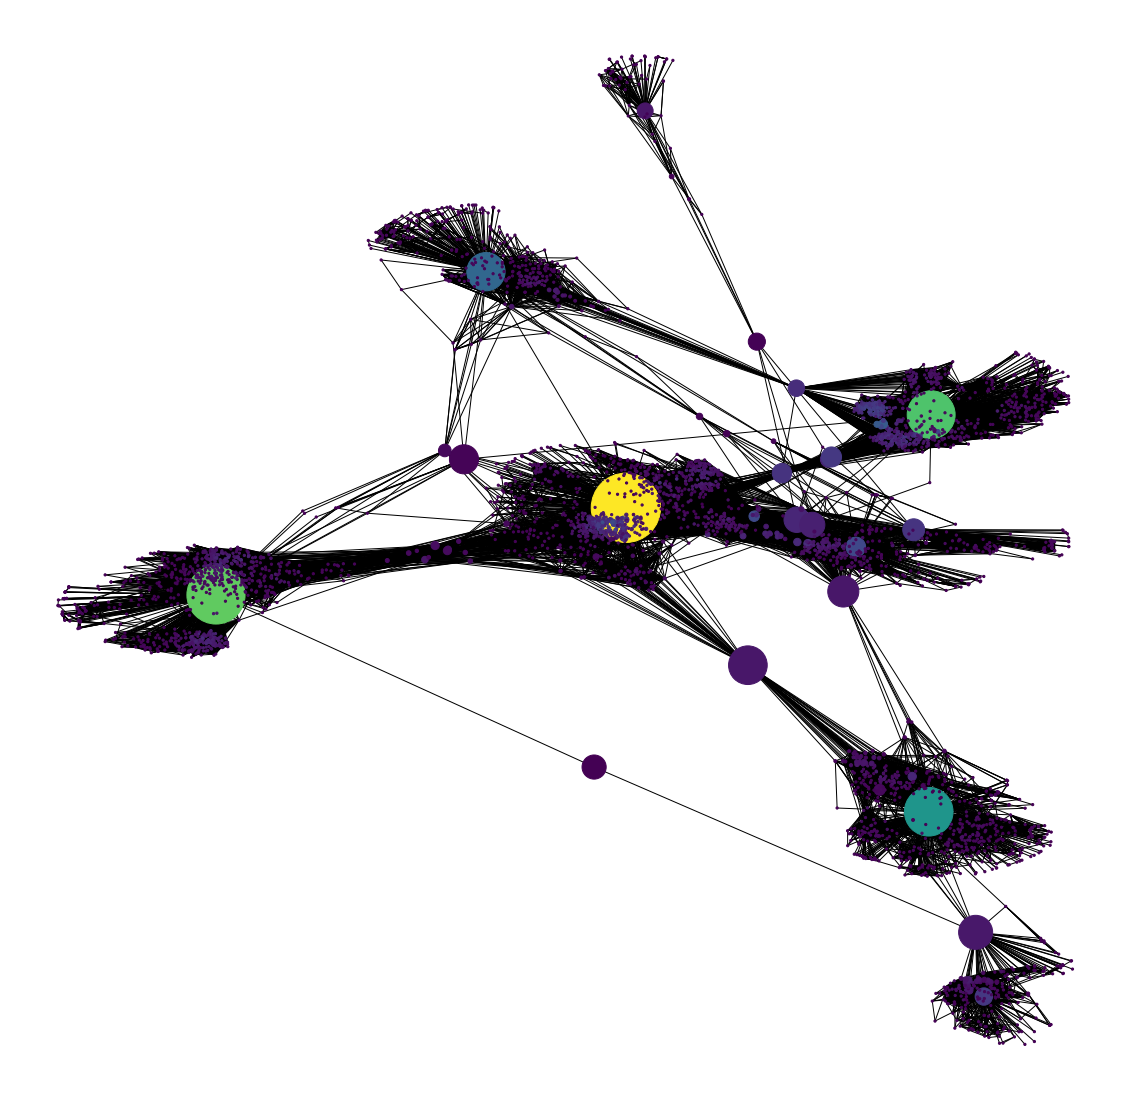

In [2]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

## 2.1 The degree distribution
#### The degree distribution only captures a small part of information about a network. But that information still gives important clues into structure of a network as it can give us a glimpse into the structure of a network and distinguish different types of networks. But it does not robust against noise.

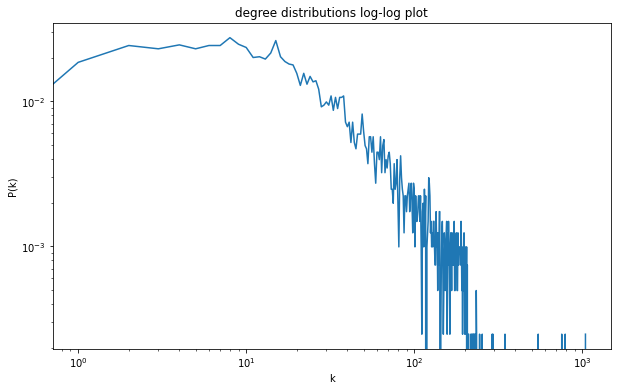

In [3]:
Pk = [float(x)/G_fb.number_of_nodes() for x in nx.degree_histogram(G_fb)]
domain = range(len(Pk))
plt.figure(figsize=(10,6))
plt.loglog(domain, Pk,'-')
xlabel('k')
ylabel('P(k)')
title('degree distributions log-log plot')
plt.show()
# plt.savefig('1.jpg')

## 2.2 The binned degree distribution
#### As binning methods consult the neighborhood of values, they perform local smoothing. It looks like smooth out noise compared to the degree distribution in the data.

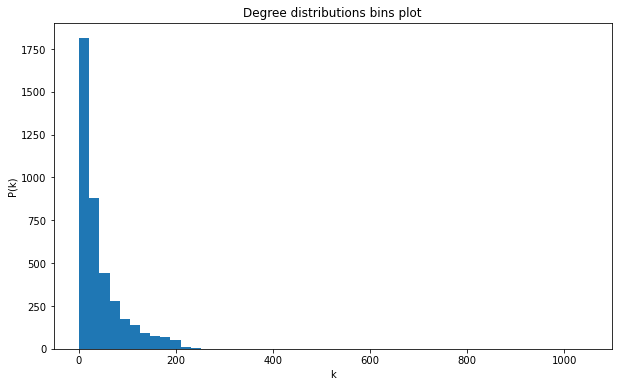

In [4]:
degree_values = [v for k, v in G_fb.degree()]
plt.figure(figsize=(10,6))
plt.hist(degree_values,bins=50)
xlabel('k')
ylabel('P(k)')
title('Degree distributions bins plot')
plt.show()
# show()
# plt.savefig('2.jpg')

In [5]:
# nx.degree_histogram(G_fb)[:10]

## 2.3 The survival probability
#### It could be called complementary cumulative distribution. It has less fluctuation than the plot of P(k). No loss of information and no need to choose a parameter.

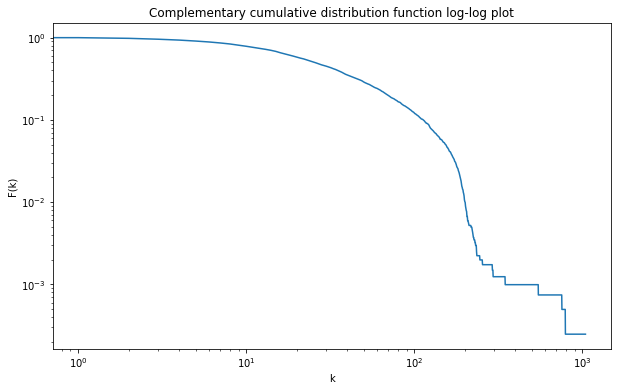

In [6]:
ccdf = [sum(Pk[k:]) for k in domain]
plt.figure(figsize=(10,6))
plt.loglog(domain, ccdf, '-')
xlabel('k')
ylabel('F(k)')
title('Complementary cumulative distribution function log-log plot')
plt.show()
# plt.savefig('3.jpg')
# show()

## 2.4 The rank plot
#### This is equivalent to the survival probability.

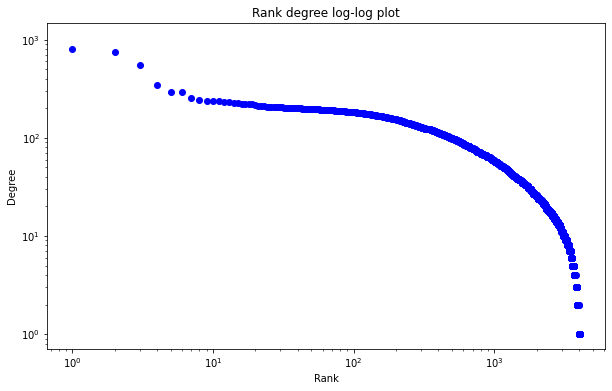

In [7]:
degree_sequence = sorted([d for n, d in G_fb.degree()], reverse=True)
plt.figure(figsize=(10,6))
plt.loglog(degree_sequence, 'bo')
plt.ylabel("Degree")
plt.xlabel("Rank")
title('Rank degree log-log plot')
# plt.savefig('4.jpg')
plt.show()

## 3. Run stochastic SIR dynamics using the Gillespie algorithm

#### Plot the final epidemic size against the infection rate, $\beta$, now assuming that infection rate $\mu=1$. To avoid bias and suppress noise, the final epidemic size at each $\beta$ value has been calculated as an average over many runs (here shows an average of 50-times calculation) and over many initial conditions. 

In [8]:
gtime={}
gS={}
gI={}
gR={}
gRR=[]
arr = []
for i in range(50):
    tau=0.005
    for j in range(100):
        tau+=.005
        gtime[j] , gS[j] , gI[j] , gR[j] =EoN.Gillespie_SIR(G_fb,tau,1)
        gRR.append(gR[j][-1])
        np.append=np.array(gRR)
        

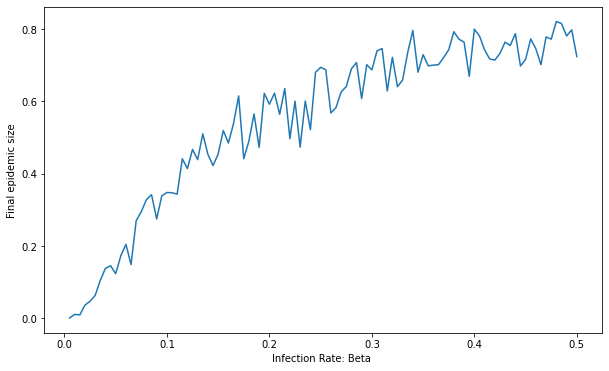

In [9]:
a = np.append
b = np.reshape(a,(50,100))
arrr2=np.sum(b, axis=0)
gbeta=np.arange (0.005, 0.505,0.005)
plt.figure(figsize=(10,6))
plt.plot(gbeta,((arrr2)*(1/50))/4039)
plt.xlabel('Infection Rate: Beta ')
plt.ylabel('Final epidemic size')
plt.show()

#### The figure shows like a blurred slanted S shape. The S-like shape of the so-called “phase diagram”. In the mean-field case (i.e., if the number of nodes $N\to \infty$), the final size is zero when $\beta \leqslant \beta_c$ and then it grows as $\beta$ increases above $\beta_c$.

### Focus on the area around $\beta_c$
#### Zoom in the area around $\beta_c$ in the figure of final epidemic size against the infection rate. For this network $\beta_c=\frac{ \left\langle k \right\rangle}{ \left\langle k^2 \right\rangle- \left\langle k \right\rangle}= 0.001577 $, which is quite small since this is a social network. So the friendship paradox is much more easier to be observed. After calculating the average degree of a neighbor, we could find out that $\frac{ \left\langle k^2 \right\rangle}{ \left\langle k \right\rangle} >> \left\langle k \right\rangle $, which means the friendship paradox holds in the Facebook data very strongly. We could also find out there is no notable epidemic when $\beta \leq \beta_c$. The epidemic will grow larger when $\beta > \beta_c$.

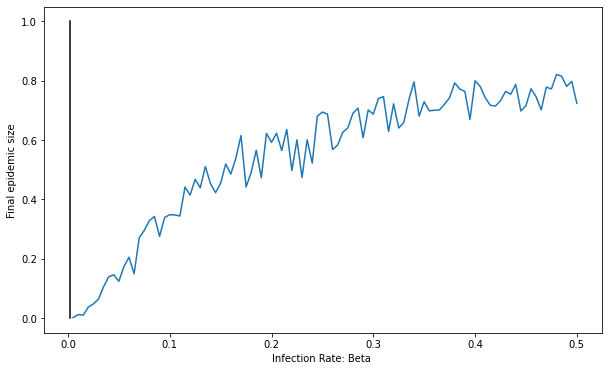

In [10]:
beta_c=43.69/((635*43.69)-43.69)

plt.figure(figsize=(10,6))
plt.plot(gbeta,((arrr2)*(1/50))/4039)
plt.plot([beta_c, beta_c], [0, 1], 'k-')
plt.xlabel('Infection Rate: Beta ')
plt.ylabel('Final epidemic size')
plt.show()

 ### Now set $\beta= 0.2$, which is greater than $\beta_c$. Then explore whether nodes with a higher degree tend to be eventually infected (and then recovered) than nodes with a smaller degree.

#### First to find the node who has the largest degree, in this network, it is node 107 with degree equals to 1045. To make a comparison, I also find node 8 with degree equals to 8, and node 2666 with degree 61. Then I plot the time against final epidemic size (and the infected size) for each of them.

In [11]:
gtime, gS, gI, gR = EoN.Gillespie_SIR(G_fb, 0.2,1,107)
gtime2, gS2, gI2, gR2=EoN.Gillespie_SIR(G_fb,0.2,1,8)
gtime3, gS3, gI3, gR3=EoN.Gillespie_SIR(G_fb,0.2,1,2666)

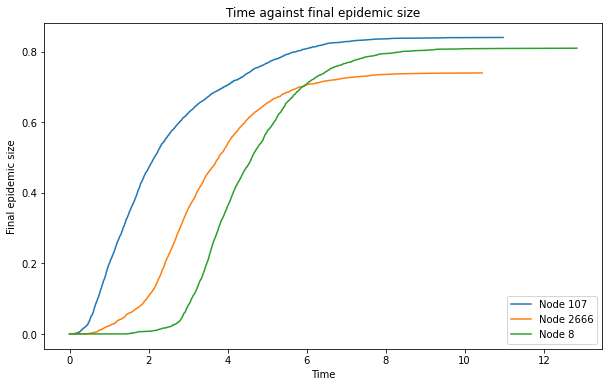

In [12]:
plt.figure(figsize=(10,6))
plt.plot(gtime,gR/4039,label='Node 107')
plt.plot(gtime3,gR3/4039,label='Node 2666')
plt.plot(gtime2,gR2/4039,label='Node 8')
plt.legend(loc='lower right')
plt.xlabel('Time')
plt.ylabel('Final epidemic size')
plt.title('Time against final epidemic size')
plt.show()

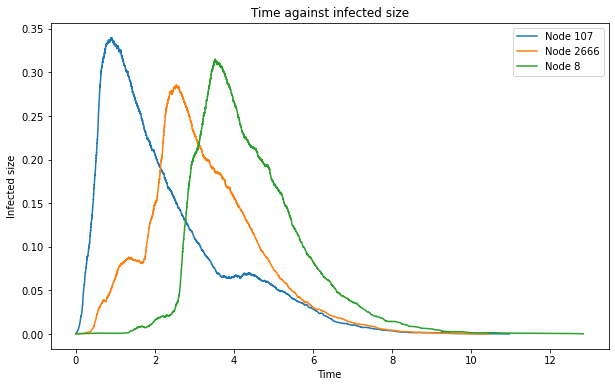

In [13]:
plt.figure(figsize=(10,6))
plt.plot(gtime,gI/4039,label='Node 107')
plt.plot(gtime3,gI3/4039,label='Node 2666')
plt.plot(gtime2,gI2/4039,label='Node 8')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Infected size')
plt.title('Time against infected size')
plt.show()

### As we could see from two figures above, it is true that nodes with a higher degree tend to be eventually infected (and then recovered) than nodes with a smaller degree.